# Network Dynamics And Learning - Homework I
## Alessandro Casella (S306081)
## s306081@studenti.polito.it
### Politecnico di Torino

In [1]:
# https://networkx.org/
import networkx as nx

import numpy as np

# https://docs.scipy.org/doc/scipy/reference/misc.html
import scipy.misc
# https://docs.scipy.org/doc/scipy/tutorial/io.html
from scipy import io

# https://www.cvxpy.org/
import cvxpy as cp

# Exercise 1

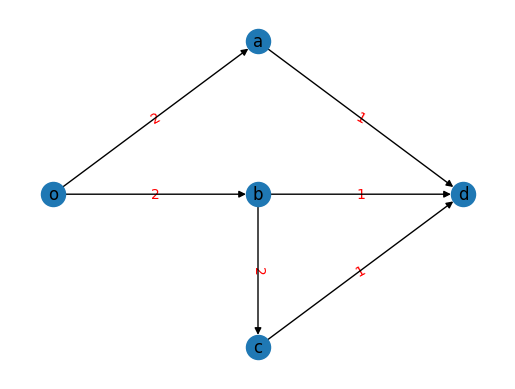

In [2]:
GG = nx.DiGraph()
GG.add_edge("o", "a", capacity=2)
GG.add_edge("o", "b", capacity=2)
GG.add_edge("a", "d", capacity=1)
GG.add_edge("b", "c", capacity=2)
GG.add_edge("b", "d", capacity=1)
GG.add_edge("c", "d", capacity=1)

pos = {'o': (40, 20), 'a': (60, 35), 'b': (60, 20), 'c': (60, 5), 'd': (80, 20)}

nx.draw_networkx_edge_labels(GG, pos, edge_labels={("o","a"):'2',
("o","b"):'2', ("a","d"):'1', ("b","c"):'2',
("b","d"):'1', ("c","d"):'1'}, font_color='red')

nx.draw(GG, pos, with_labels = True)

## 1(a)

In [3]:
nx.algorithms.flow.maximum_flow(GG,'o','d')

(3,
 {'o': {'a': 1, 'b': 2},
  'a': {'d': 1},
  'b': {'c': 1, 'd': 1},
  'd': {},
  'c': {'d': 1}})

In [4]:
nx.algorithms.flow.minimum_cut(GG,'o','d')

(3, ({'a', 'b', 'c', 'o'}, {'d'}))

 The minimal capacity that needs to be removed equals the capacity of the min-cut of the network, which is 3.

# 1(b)

We want that the throughput does not change, this means that the min-cut capacity must remain = 3. Since what we can do is only to remove capacity (not add), we cannot find another path, different from the one we found, in which the flow is equal 3.
Taking care of this, to satisfy the static condition of throughput, we cannot change the capacities ad,bd,cd and also we cannot disconnect the components 'a','b','c','o'.
The consequence of this latter observation is that the capacities oa,ob,oc cannot be taken to 0. So we can remove capacities on oa,ob,bc.

In [5]:
GG['o']['a']['capacity'] = 1
GG['o']['b']['capacity'] = 2
GG['b']['c']['capacity'] = 1

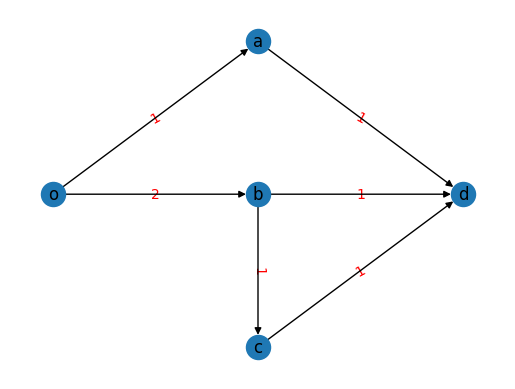

In [6]:
nx.draw_networkx_edge_labels(GG, pos, edge_labels={("o","a"):GG['o']['a']['capacity'],
("o","b"):GG['o']['b']['capacity'], ("a","d"):GG['a']['d']['capacity'], ("b","c"):GG['b']['c']['capacity'],
("b","d"):GG['b']['d']['capacity'], ("c","d"):GG['c']['d']['capacity']}, font_color='red')
nx.draw(GG, pos, with_labels = True)

To guarantee that the min-cut capacity is still 3, we remove 1 unit in oa and 1 unit in bc.
If we removed 1 unit also in ob, the min cut capacity would be 2, not 3 anymore.

## 1(c)

In [7]:
"""We have 6 edges in which we distribute a total of x
n=6 edges, M=x=3 for example
We know that we can make
(M+n-1) C (n-1) different distributions of capacities to the edges
(3+6-1) C (6-1) = 8 C 5 = 56
"""

from itertools import product

edges = ['oa', 'ob', 'ad', 'bd', 'bc', 'cd']
# The possible associations for when I put a capacity of x
# are accessible by associations[x-1]
associations = []

for x in np.arange(2,17): # np.arange(a,b) ->  a-1 <= x <= b-2
    poss_choices = np.arange(0,x) #1st: [0,1], 2nd: [0,1,2] ...
    # cartesian product
    all_combs = list(product(poss_choices, repeat=len(edges)))
    filtered_combs = []
    for row in all_combs:
        row_sum = 0
        for elem in row:
            row_sum += elem
        if row_sum == x-1:
            filtered_combs.append(row)
    poss_associations = list(list(zip(edges, element)) for element in filtered_combs)
    associations.append(poss_associations)

In [8]:
max_ths = []
for i, x in enumerate(associations):
    max_th = 0
    cut = tuple()
    for row in x:
        GG = nx.DiGraph()
        GG.add_edge("o", "a", capacity=2)
        GG.add_edge("o", "b", capacity=2)
        GG.add_edge("a", "d", capacity=1)
        GG.add_edge("b", "c", capacity=2)
        GG.add_edge("b", "d", capacity=1)
        GG.add_edge("c", "d", capacity=1)
        for edge, capacity in row:
            if capacity > 0:
                GG[edge[0]][edge[1]]['capacity'] = list(GG.get_edge_data(edge[0],edge[1]).values())[0] + capacity
        min_cut = nx.algorithms.flow.minimum_cut(GG,'o','d')
        throughput = min_cut[0]
        if throughput > max_th:
            oa=GG.get_edge_data("o", "a")
            ob=GG.get_edge_data("o", "b")
            ad=GG.get_edge_data("a", "d")
            bc=GG.get_edge_data("b", "c")
            bd=GG.get_edge_data("b", "d")
            cd=GG.get_edge_data("c", "d")
            max_th = throughput
            cut = min_cut[1]
    max_ths.append({i+1: max_th})
    print(f"--- Assigned x={i+1} extra units of capacity ---")
    print("New configuration of edges for maximum throughput:")
    print(f"- oa: {oa}")
    print(f"- ob: {ob}")
    print(f"- ad: {ad}")
    print(f"- bc: {bc}")
    print(f"- bd: {bd}")
    print(f"- cd: {cd}")
    print(f"Max throughput={max_th} obtained with cut {cut}")
    print("\n")

--- Assigned x=1 extra units of capacity ---
New configuration of edges for maximum throughput:
- oa: {'capacity': 2}
- ob: {'capacity': 2}
- ad: {'capacity': 2}
- bc: {'capacity': 2}
- bd: {'capacity': 1}
- cd: {'capacity': 1}
Max throughput=4 obtained with cut ({'c', 'o', 'a', 'b'}, {'d'})


--- Assigned x=2 extra units of capacity ---
New configuration of edges for maximum throughput:
- oa: {'capacity': 2}
- ob: {'capacity': 2}
- ad: {'capacity': 2}
- bc: {'capacity': 2}
- bd: {'capacity': 1}
- cd: {'capacity': 2}
Max throughput=4 obtained with cut ({'a', 'o'}, {'b', 'd', 'c'})


--- Assigned x=3 extra units of capacity ---
New configuration of edges for maximum throughput:
- oa: {'capacity': 2}
- ob: {'capacity': 3}
- ad: {'capacity': 2}
- bc: {'capacity': 2}
- bd: {'capacity': 1}
- cd: {'capacity': 2}
Max throughput=5 obtained with cut ({'c', 'o', 'a', 'b'}, {'d'})


--- Assigned x=4 extra units of capacity ---
New configuration of edges for maximum throughput:
- oa: {'capacity': 

In [9]:
max_ths

[{1: 4},
 {2: 4},
 {3: 5},
 {4: 5},
 {5: 6},
 {6: 6},
 {7: 7},
 {8: 7},
 {9: 8},
 {10: 8},
 {11: 9},
 {12: 9},
 {13: 10},
 {14: 10},
 {15: 11}]

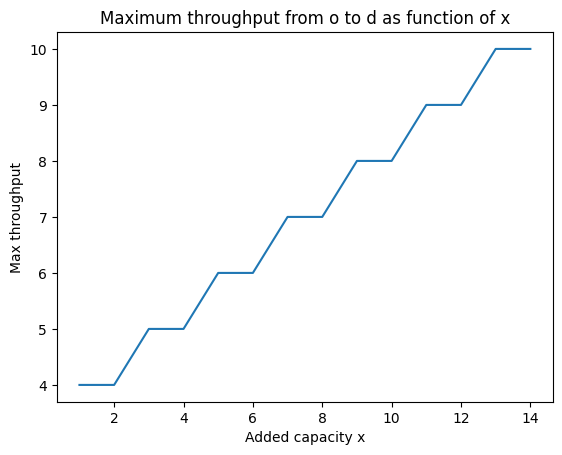

In [10]:
import matplotlib.pyplot as plt

y = [list(mt.values())[0] for mt in max_ths[:-1]]
plt.plot(np.arange(1,15), y)
plt.xlabel('Added capacity x')
plt.ylabel('Max throughput')
plt.title('Maximum throughput from o to d as function of x')
plt.show()

# Exercise 2
* a set of people {p1, p2, p3, p4}
* a set of books {b1, b2, b3, b4}

- p1 → {b1, b2}
- p2 → {b2, b3}
- p3 → {b1, b4}
- p4 → {b1, b2, b4}.

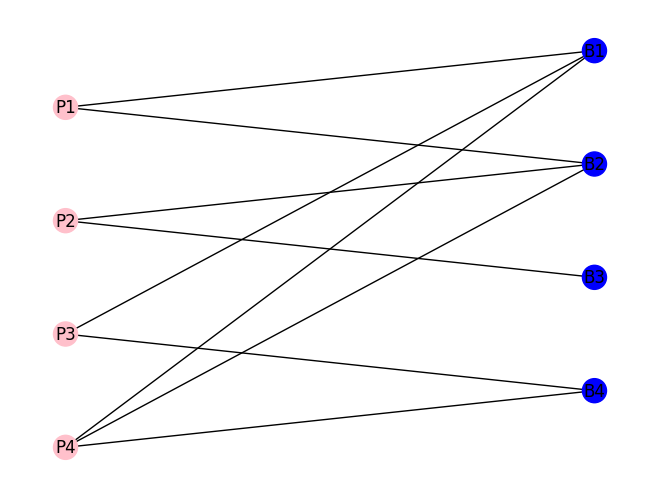

In [45]:
G = nx.Graph()
G.add_edges_from([('P1','B1'),('P1','B2'),('P2','B2'),('P2','B3'), ('P3', 'B1'),
                  ('P3', 'B4'), ('P4', 'B1'), ('P4', 'B2'), ('P4', 'B4')])

color_map = ['pink' if 'P' in node else 'blue' for node in G]
pos = {'P1':[0,4], 'P2':[0,2], 'P3':[0,0], 'P4':[0,-2], 'B1':[2,5], 'B2': [2, 3],
       'B3': [2, 1], 'B4': [2, -1]}

nx.draw(G, pos, node_color=color_map, with_labels=True)

simple_graph = G.copy()
simple_pos = pos.copy()
simple_colormap = color_map.copy()

## 2(a)
Does a perfect matching people-books exist?
Before exploiting the max-flow problem, we need to remodel the graph:
1) we make it directed
2) we add a node origin and a node destination which are connected respectively to all the people and all the books
3) we add capacities of 1 to every link

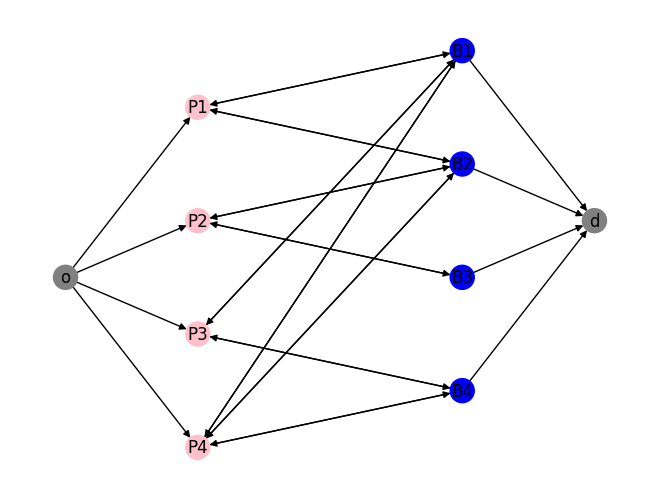

In [46]:
G = nx.DiGraph(G) # 1

for n in range(4):
    G.add_edge('o', 'P'+str(n+1)) # 2. from o to all the people
    G.add_edge('B'+str(n+1), 'd') # 2. from all the books to d

# adding to the dictionary of pos
pos['o'] = [-1, 1]
pos['d'] = [3, 2]

# o and d are the last two elements of pos
# to color them grey, we add two 'grey' at the end of color_map
for i in range(2):
    color_map.append('grey')

nx.draw(G, pos, node_color=color_map, with_labels=True)

In [47]:
# 3
for i,j in G.edges():
    G[i][j]['capacity'] = 1

P1 B1 {'capacity': 1}
P1 B2 {'capacity': 1}
B1 P1 {'capacity': 1}
B1 P3 {'capacity': 1}
B1 P4 {'capacity': 1}
B1 d {'capacity': 1}
B2 P1 {'capacity': 1}
B2 P2 {'capacity': 1}
B2 P4 {'capacity': 1}
B2 d {'capacity': 1}
P2 B2 {'capacity': 1}
P2 B3 {'capacity': 1}
B3 P2 {'capacity': 1}
B3 d {'capacity': 1}
P3 B1 {'capacity': 1}
P3 B4 {'capacity': 1}
B4 P3 {'capacity': 1}
B4 P4 {'capacity': 1}
B4 d {'capacity': 1}
P4 B1 {'capacity': 1}
P4 B2 {'capacity': 1}
P4 B4 {'capacity': 1}
o P1 {'capacity': 1}
o P2 {'capacity': 1}
o P3 {'capacity': 1}
o P4 {'capacity': 1}


The cardinality of a maximum matching is given by the min-cut capacity = max flow = throughput.
In our case it's 4 and |P|=|B|=4 means that all nodes are matched.
There exists a perfect matching of cardinality 4.

In [51]:
def get_active_edges(g, simple_g, simple_p, simple_cm):
    # maximum flow problem
    flows_to_return = nx.maximum_flow(G, "o", "d")
    links_flows = flows_to_return[1]
    # we want to use only the info of edges between people and books
    del links_flows['o']
    del links_flows['d']
    # we also delete the B keys since the P keys already contain this info
    for index in np.arange(1,5):
        del links_flows['B'+str(index)]
    # set of tuples which represent all the links between people and books, with flows > 0
    edges_to_return = set()
    for r in links_flows.items():
        for b,cap in r[1].items():
            if cap != 0:
                edges_to_return.add((r[0], b))
    # we print the new graph
    c_map = []
    for (ii, jj) in simple_graph.edges:
        if (ii, jj) in edges_to_return or (jj, ii) in edges_to_return:
            c_map.append('red')
        else:
            c_map.append('black')
    nx.draw(simple_graph, simple_pos, node_color=simple_colormap, edge_color=c_map, with_labels=True)
    return edges_to_return, flows_to_return

({('P1', 'B2'), ('P2', 'B3'), ('P3', 'B4'), ('P4', 'B1')},
 (4,
  {'P1': {'B1': 0, 'B2': 1},
   'P2': {'B2': 0, 'B3': 1},
   'P3': {'B1': 0, 'B4': 1},
   'P4': {'B1': 1, 'B2': 0, 'B4': 0}}))

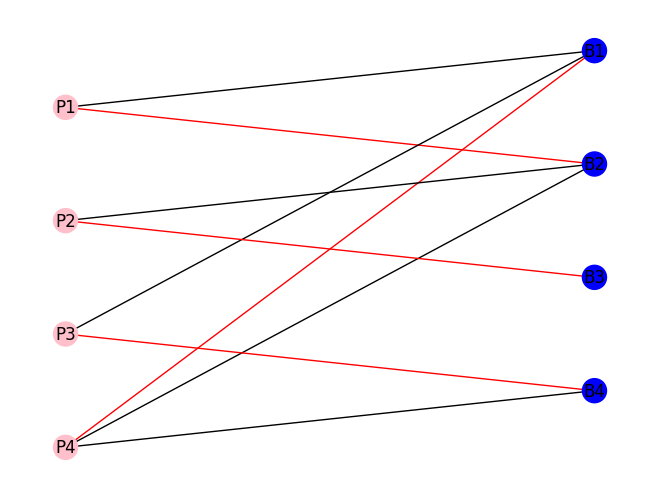

In [52]:
active_edges, flows = get_active_edges(G, simple_graph, simple_pos, simple_colormap)
active_edges, flows

## 2(b)
- Number of book copies: (2,3,2,2)
- Pi can take n different books
    for every i, for n>0

How many books can be assigned in total?

To model multiple copies of books, we put the capacity of edge $(Book_{i}, d)$ equal to the number of copies of $Book_{i}$.
Since people can choose an arbitrary number of books of interest, we put capacity of edge $(o, Person_{j}) = + inf$.
We suppose that each person can take only 1 copy of the same book, so the capacity of the edge $(Book_{i}, Person{j})$ = 1.

The maximum flow represents the number of copies assigned to all the people.

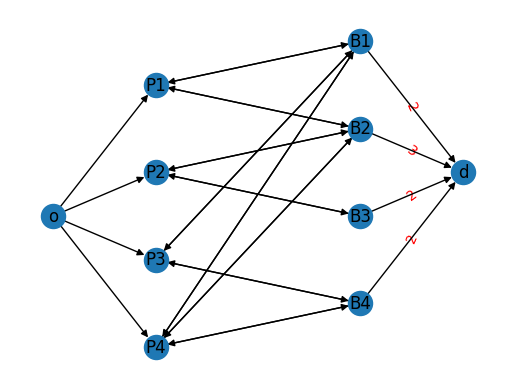

In [53]:
"""
o --> P --> B --> d
* o --> P flow is potentially infinite
* P --> B flow is <= 1
* B --> d flow is = to its number of copies
"""

# o --> P
G['o']['P1']['capacity'] = np.inf
G['o']['P2']['capacity'] = np.inf
G['o']['P3']['capacity'] = np.inf
G['o']['P4']['capacity'] = np.inf
# P --> B
G['P1']['B1']['capacity'] = 1
G['P1']['B2']['capacity'] = 1
G['P2']['B2']['capacity'] = 1
G['P2']['B3']['capacity'] = 1
G['P3']['B1']['capacity'] = 1
G['P3']['B4']['capacity'] = 1
G['P4']['B1']['capacity'] = 1
G['P4']['B2']['capacity'] = 1
G['P4']['B4']['capacity'] = 1
# B --> d
G['B1']['d']['capacity'] = 2
G['B2']['d']['capacity'] = 3
G['B3']['d']['capacity'] = 2
G['B4']['d']['capacity'] = 2

nx.draw_networkx_edge_labels(G, pos, edge_labels={('B1','d'): '2',
                                                  ('B2','d'): '3',
                                                  ('B3','d'): '2',
                                                  ('B4','d'): '2'},
                             font_color='red')

nx.draw(G, pos, with_labels = True)

({('P1', 'B2'),
  ('P2', 'B2'),
  ('P2', 'B3'),
  ('P3', 'B1'),
  ('P3', 'B4'),
  ('P4', 'B1'),
  ('P4', 'B2'),
  ('P4', 'B4')},
 (8,
  {'P1': {'B1': 0, 'B2': 1},
   'P2': {'B2': 1, 'B3': 1},
   'P3': {'B1': 1, 'B4': 1},
   'P4': {'B1': 1, 'B2': 1, 'B4': 1}}))

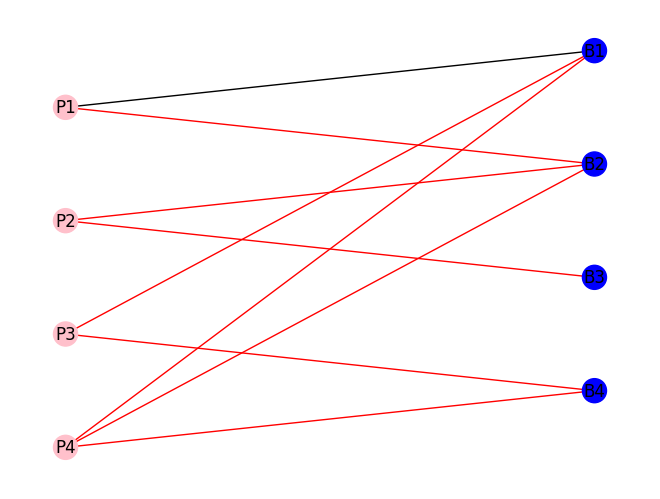

In [54]:
active_edges_2, flows_2 = get_active_edges(G, simple_graph, simple_pos, simple_colormap)
active_edges_2, flows_2

How many books can be assigned in total? 8 = max flow
- B1 has 2 copies not 3, this is why we take off one edge from it

## 2(c)
Library:
- can sell a copy of a book
- buy a copy of another book

Which are the 2 books to **maximize the # of assigned books**?

From the previous graph, we notice that:
* P1 would like to have B1 but there are no more copies available;
* there are 2 copies of B3, but only 1 is given to a person. Only 1 person, P2, wants B3.

Taking care of these observations, we can say that if the library:
* sold 1 copy of B3
* bought 1 copy of B1

then the number of assigned books would be maximized.

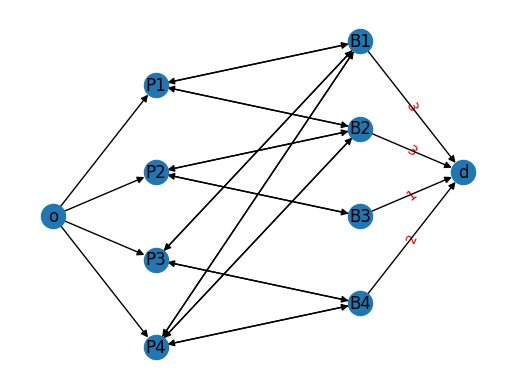

In [55]:
G['B1']['d']['capacity'] = 2+1
G['B3']['d']['capacity'] = 2-1

nx.draw_networkx_edge_labels(G, pos, edge_labels={('B1','d'): G['B1']['d']['capacity'],
                                                  ('B2','d'): G['B2']['d']['capacity'],
                                                  ('B3','d'): G['B3']['d']['capacity'],
                                                  ('B4','d'): G['B4']['d']['capacity']},
                             font_color='red')

nx.draw(G, pos, with_labels = True)

({('P1', 'B1'),
  ('P1', 'B2'),
  ('P2', 'B2'),
  ('P2', 'B3'),
  ('P3', 'B1'),
  ('P3', 'B4'),
  ('P4', 'B1'),
  ('P4', 'B2'),
  ('P4', 'B4')},
 (9,
  {'P1': {'B1': 1, 'B2': 1},
   'P2': {'B2': 1, 'B3': 1},
   'P3': {'B1': 1, 'B4': 1},
   'P4': {'B1': 1, 'B2': 1, 'B4': 1}}))

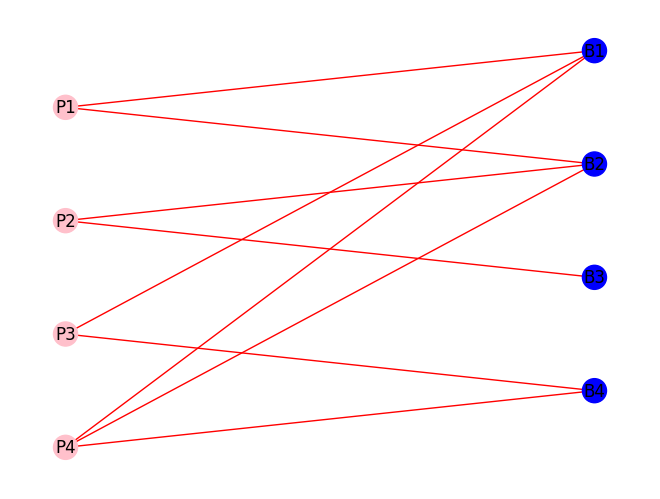

In [56]:
active_edges_3, flows_3 = get_active_edges(G, simple_graph, simple_pos, simple_colormap)
active_edges_3, flows_3